# Getting Started in Machine Learning 

## Chapter 6: LASSO Regression

This notebook contains examples from the book: 

_Getting Started in Machine Learning: Easy Recipes for Python 3, Scikit-Learn, Jupyter_ (2019) by Bella Romeo, Sherwood Forest Books, Los Angeles, CA, USA, ISBN-13: 978-0-9966860-6-8

(c) Copyright 2019. 

    
    This notebook is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program. If not, see <https://www.gnu.org/licenses/>.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data=pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
           header=None,na_values="?")
data.columns=("mpg","cyl","displ","hp","weight","accel","model","origin","carname")
data = data.dropna(axis=0)
data[:5]

,mpg,cyl,displ,hp,weight,accel,model,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [3]:
cardata=data[["mpg","cyl","displ","hp","weight","accel"]].copy()
cardata[:5]

,mpg,cyl,displ,hp,weight,accel
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0
3,16.0,8,304.0,150.0,3433.0,12.0
4,17.0,8,302.0,140.0,3449.0,10.5


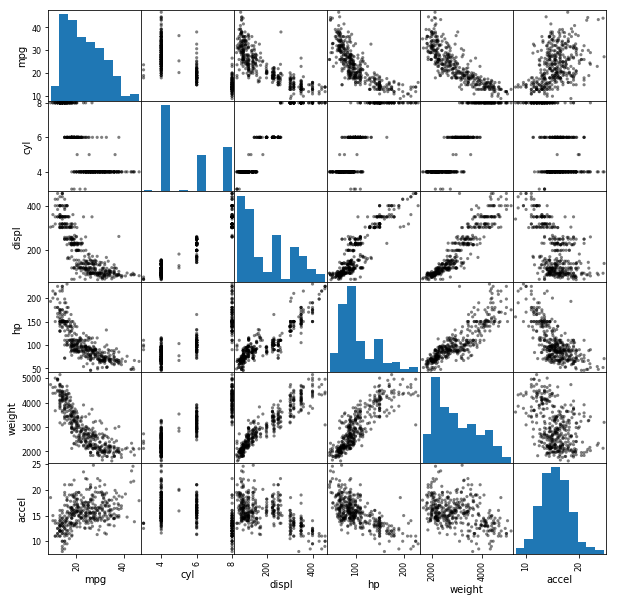

In [4]:
rr = pd.plotting.scatter_matrix(cardata, figsize=(10,10), 
                                marker="o",s=10,c="black")
fig=plt.gcf()
fig.savefig("MPG-Scatter-Matrix.pdf")

In [5]:
#cardata=data[["mpg","cyl","displ","hp","weight","accel"]].copy()
X=np.array(data[["cyl","displ","hp","weight", "accel"]])
Y=np.array(data["mpg"]).reshape(-1,1)
n=len(Y)

In [6]:
#import random
#indices=list(range(n))
#random.shuffle(indices)
#ntrain=round(.75*n)
#training_indices=indices[:ntrain]
#test_indices=indices[ntrain:]
#XTRAIN=X[training_indices]
#YTRAIN=Y[training_indices].reshape(-1,1)
#XTEST=X[test_indices]
#YTEST=Y[test_indices].reshape(-1,1)

from sklearn.model_selection import train_test_split
XTRAIN,XTEST,YTRAIN,YTEST=train_test_split(X,Y)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Standard Linear Regression

In [8]:
r=LinearRegression().fit(XTRAIN,YTRAIN)
print("intercept:", r.intercept_)
print("Coefficients:", r.coef_)

intercept: [46.61541049]
Coefficients: [[-2.72955370e-01 -2.70516119e-04 -4.87242694e-02 -5.23118765e-03
  -5.57303275e-02]]


In [9]:
P=r.predict(XTEST)

In [10]:
R2=r2_score(YTEST,P)
MSE = mean_squared_error(YTEST,P)
print("R2=",R2, "MSE=", MSE)

R2= 0.7243946457961113 MSE= 15.226028428489439


## Lasso

In [12]:
from sklearn.linear_model import Lasso

In [13]:
r=Lasso(alpha=1)
r.fit(XTRAIN,YTRAIN)
PRED=r.predict(XTEST)
MSE = mean_squared_error(YTEST,PRED)

In [14]:
print("intercept:", r.intercept_)
print("Coefficients:", r.coef_)
print("MSE:",MSE)

intercept: [45.00854695]
Coefficients: [-0.         -0.00421348 -0.04043988 -0.0055145  -0.        ]
MSE: 15.304557614033477


In [27]:
XTRAIN,XTEST,YTRAIN,YTEST=train_test_split(X,Y)

alphas = np.logspace(-3,3,100)
coefs=[]
errs=[]
intcpts=[]
for a in alphas:
    r.set_params(alpha=a)
    r.fit(XTRAIN,YTRAIN)
    coefs.append(list(r.coef_))
    intcpts.append(float(r.intercept_))
    PRED=r.predict(XTEST)
    MSE = mean_squared_error(YTEST,PRED)
    errs.append(MSE)
coefs=np.array(coefs).T

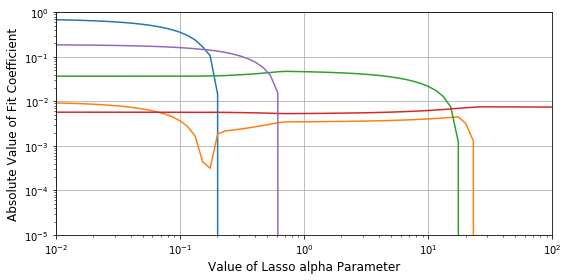

In [28]:

for row in coefs:
    plt.plot(alphas, np.abs(row))
#plt.plot(alphas,np.abs(intcpts))
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.ylabel("Absolute Value of Fit Coefficient", fontsize=12)
plt.xlabel("Value of Lasso alpha Parameter", fontsize=12)
#plt.plot([12,12],[.00001,1],ls=":",c="k")
plt.ylim([.00001,1])
plt.xlim(.01,100)

fig=plt.gcf()
fig.set_size_inches(8,4)
fig.tight_layout()
#fig.savefig("car-mpg-lasso-coef-plot.pdf")

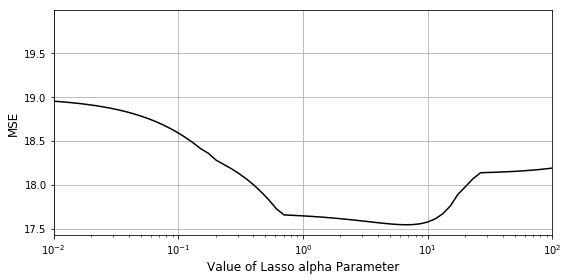

In [29]:
plt.plot(alphas,errs,c="k")
#plt.plot([12,12],[17.6,18.6],ls=":",c="k")
plt.xscale("log")
plt.xlim(.01,100)
plt.grid()
plt.xlabel("Value of Lasso alpha Parameter",fontsize="12")
plt.ylabel("MSE",fontsize="12")
#plt.ylim([17.6,18.6])
fig=plt.gcf()
fig.set_size_inches(8,4)
fig.tight_layout()
#fig.savefig("car-mpg-lasso-MSE-plot.pdf")